In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Input

In [6]:
BASE_DIR = r'C:\Users\Sameer\Desktop\ML\Projects\ML\GD and AP\UTKFace'

In [7]:
image_paths = []
age_labels = []
gender_labels = []
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age  = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [8]:
df = pd.DataFrame()

In [9]:
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels

In [10]:
#Map Labels for gender
gender_dic = {0:'Male', 1:'Female'}

<AxesSubplot: xlabel='age', ylabel='Density'>

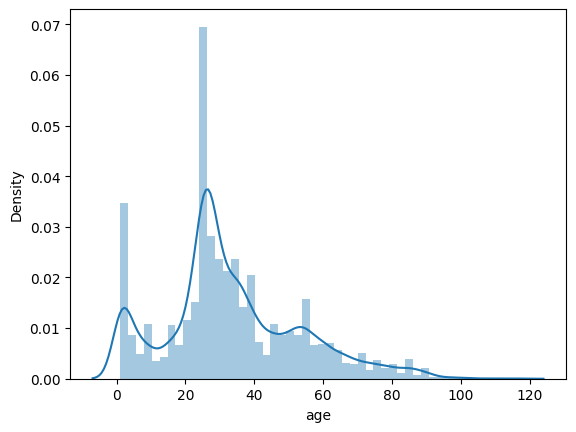

In [11]:
#EDA
sns.distplot(df['age'])

<AxesSubplot: xlabel='gender', ylabel='Density'>

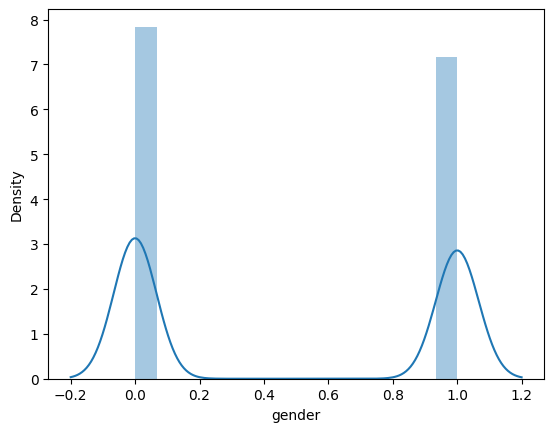

In [12]:
sns.distplot(df['gender'])

# Grid of Images

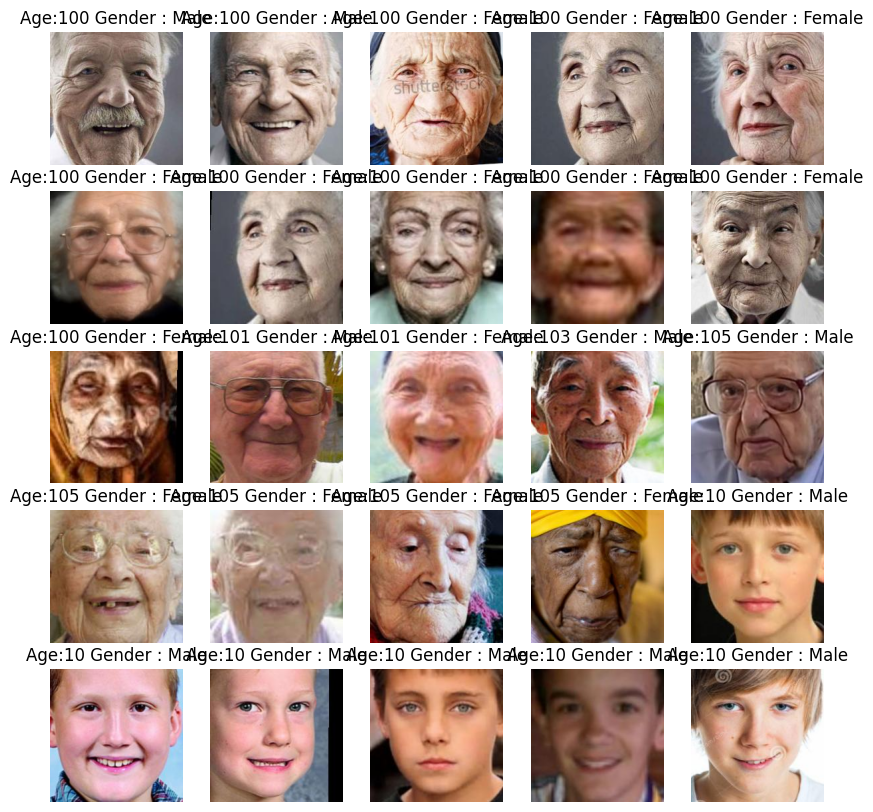

In [13]:
plt.figure(figsize= (10,10))
files = df.iloc[0:25]
for index,file,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age:{age} Gender : {gender_dic[gender]}")
    plt.axis('off')
               

# Feature Extraction

In [14]:
from PIL import Image

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img) 
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [16]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [17]:
X.shape

(23708, 128, 128, 1)

In [18]:
X = X/255

In [19]:
import numpy as np
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
input_shape = (128,128,1)

# Model Creation

In [20]:
inputs = Input((input_shape))

In [ ]:
#Convolution Layers
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(co1nv_1)



In [ ]:
flatten = Flatten()(maxp_1_)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

In [ ]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Prediction

In [ ]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');